
# 一、基本信息

1. 实验名称：Matplotlib可视化分析全球星巴克门店统计数据
2. 实验学时：2
3. 实验类别：基本应用性
4. 课程名称：数据分析基础（Python）
5. 课程编号：12002CC019


# 二、实验目的（预期学习效果）



本实验应符合课程总体学习要求，促进以下预期效果的达成：
* 掌握Python可视化常用工具，实现Python数据可视化操作，提高数据分析能力。

涉及主要KT点包括：
* KT23_Matplotlib绘图基础
* KT24_Matplotlib设置Pyplot的动态rc参数
* KT25_Matplotlib的Pyplot中的常用绘图

实验应当促使学生掌握相关KT点，并且在实际数据分析过程当中进行应用。



# 三、实验任务及原理



本次实验针对一组关于全球星巴克门店的统计数据，通过Matplotlib分析不同国家或地区以及中国不同城市星巴克门店数量的分布情况。

# 四、实验环境

实验仪器设备：计算机。

实验软件：Jupyter Notebook。

工具耗材：无。

# 五、实验预习任务



实验前，应复习本实验涉及的KT点，并完成前次布置的相关练习题目，并阅读相关参考性资料，做好实验前准备。

# 六、实验过程（实验方案）



## 请按照笔记本任务提示，完成相关任务

## 导入相关模块并设置

In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline

## 获取数据

In [2]:
starbucks = pd.read_csv("data//directory.csv")
starbucks.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


## 数据分析与可视化

In [3]:
starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           25600 non-null  object 
 1   Store Number    25600 non-null  object 
 2   Store Name      25600 non-null  object 
 3   Ownership Type  25600 non-null  object 
 4   Street Address  25598 non-null  object 
 5   City            25585 non-null  object 
 6   State/Province  25600 non-null  object 
 7   Country         25600 non-null  object 
 8   Postcode        24078 non-null  object 
 9   Phone Number    18739 non-null  object 
 10  Timezone        25600 non-null  object 
 11  Longitude       25599 non-null  float64
 12  Latitude        25599 non-null  float64
dtypes: float64(2), object(11)
memory usage: 2.5+ MB


In [4]:
starbucks.isnull().sum()

Brand                0
Store Number         0
Store Name           0
Ownership Type       0
Street Address       2
City                15
State/Province       0
Country              0
Postcode          1522
Phone Number      6861
Timezone             0
Longitude            1
Latitude             1
dtype: int64

In [5]:
star = starbucks.dropna(how='any',subset=['City'])
star.isnull().sum()

Brand                0
Store Number         0
Store Name           0
Ownership Type       0
Street Address       2
City                 0
State/Province       0
Country              0
Postcode          1507
Phone Number      6861
Timezone             0
Longitude            1
Latitude             1
dtype: int64

In [6]:
# 星巴克旗下有哪些品牌？
print("星巴克旗下品牌有：\n",starbucks.Brand.value_counts())
# 把重心放在星巴克的咖啡门店上面，所以只查看Brand是Starbucks的数据集内容。
coffee = starbucks[starbucks.Brand=='Starbucks']
# 全世界一共有多少家星巴克门店？
print("-------------------------")
print(coffee.shape)

星巴克旗下品牌有：
 Starbucks                25249
Teavana                    348
Evolution Fresh              2
Coffee House Holdings        1
Name: Brand, dtype: int64
-------------------------
(25249, 13)


In [7]:
df = starbucks.groupby(["Country"]).size()
print("全世界一共多少个国家或地区开设了星巴克门店:",df.size)
df1 = df.sort_values( ascending=False)
print("排名前10的国家或地区：\n",df1.head(10))

全世界一共多少个国家或地区开设了星巴克门店: 73
排名前10的国家或地区：
 Country
US    13608
CN     2734
CA     1468
JP     1237
KR      993
GB      901
MX      579
TW      394
TR      326
PH      298
dtype: int64


In [8]:
# 星巴克门店数排名后10的国家或地区
# df2 = df.sort_values()
# df2.head(10)
print("排名后10的国家或地区：\n",df1.tail(10))

排名后10的国家或地区：
 Country
BO    4
AZ    4
TT    3
ZA    3
SK    3
CW    3
AW    3
MC    2
LU    2
AD    1
dtype: int64


unique()：是以数组形式（numpy.ndarray）返回列的所有唯一值（特征的所有唯一值）

nunique()：返回dataframe中列的唯一值的个数,也可用于series

In [9]:

# 全世界一共多少个国家或地区开设了星巴克门店？
coffee.Country.nunique()

73

## **任务1** Matplotlib参数设置
为Matplotlib绘图内容提前设置好个性化参数。


## **问题1:** 设置Pyplot的动态rc参数



## 操作说明：
应当调用plt当中rcParams来进行设定：
- 首先设定字体大小`font.size`为15
- 而后设定`font.family`为`font.family`，保证中文字体显示正常


In [10]:
# 首先设定字体大小`font.size`为15
plt.rcParams['font.size'] = 15
# 而后设定`font.family`为`SimHei`，保证中文字体显示正常
plt.rcParams['font.family'] = 'SimHei'

## **问题2:** 通过柱状图绘制排名前10的分布情况


## 操作说明：
直接调用pandas当中dataframe的作图方法，实际上pandas作图仍然依赖matplotlib。此处，应当设置`df_top_10`的plot当中`kind`正确类型，而柱状图对应的类型为`bar`。



<AxesSubplot:xlabel='Country'>

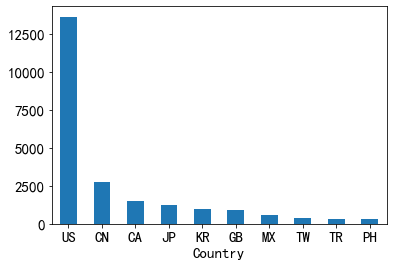

In [11]:
df_top_10 = df1.head(10)
# 设置`df_top_10`的plot当中`kind`正确类型，而柱状图对应的类型为`bar`。
df_top_10.plot(kind='bar',rot=0)

## **问题3:** 设置图形标题


## 操作说明：
需要调用`plt`当中的`title()`方法，为图形设置标题。



Text(0.5, 1.0, '星巴克门店数排名前10的国家或地区')

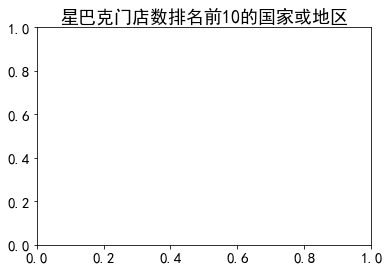

In [12]:
# 调用`plt`当中的`title()`方法，为图形设置标题。
plt.title('星巴克门店数排名前10的国家或地区')

## **问题4:** 设置轴标签


## 操作说明：
- 使用plt的ylabel方法为y轴设置标签
- 使用plt的xlabel方法为x轴设置标签



Text(0.5, 0, 'Countries')

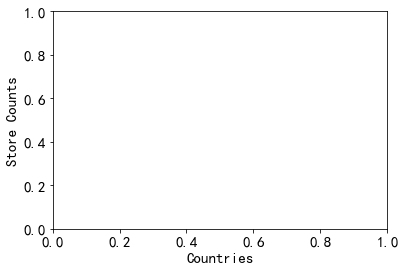

In [13]:
# 使用plt的ylabel方法为y轴设置标签
plt.ylabel('Store Counts')
# 使用plt的xlabel方法为x轴设置标签
plt.xlabel('Countries')

In [14]:
# 获取星巴克门店数排名后10的国家或地区
df_tail_10 = df1.tail(10)


## **任务2** Matplotlib绘图 
利用Matplotlib绘制相关可视化图形。 

## **问题5:** 绘制星巴克门店数排名后10的国家或地区的柱状图


## 操作说明：
- 绘制星巴克门店数排名后10的国家或地区的柱状图
- 为图形添加标题
- 为y轴添加标签
- 为x轴添加标签



Text(0.5, 0, 'Countries')

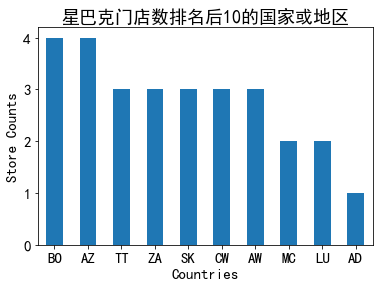

In [15]:
# 绘制星巴克门店数排名后10的国家或地区的柱状图
df_tail_10.plot(kind='bar',rot=0)
# 为图形添加标题
plt.title('星巴克门店数排名后10的国家或地区')
# 为y轴添加标签
plt.ylabel('Store Counts')
# 为x轴添加标签
plt.xlabel('Countries')

## 获取全世界星巴克门店数量排名前10的城市

In [16]:
star = starbucks.dropna(how='any',subset=['City'])
star.isnull().sum()
count_starbucks_city = star.City.value_counts()
print("全世界星巴克门店数量排名前10的城市：\n",count_starbucks_city.head(10))

全世界星巴克门店数量排名前10的城市：
 上海市            542
Seoul          243
北京市            234
New York       232
London         216
Toronto        192
Chicago        180
Mexico City    180
Seattle        156
Las Vegas      156
Name: City, dtype: int64


In [17]:

count_starbucks_city =star.City.value_counts()
city_top10 = count_starbucks_city.head(10)


## **问题6:** 绘制拥有星巴克门店最多的10个城市的柱状图


## 操作说明：
- 绘制星巴克门店数排名后10的国家或地区的柱状图
- 为图形添加标题
- 为y轴添加标签
- 为x轴添加标签



Text(0.5, 0, 'Cities')

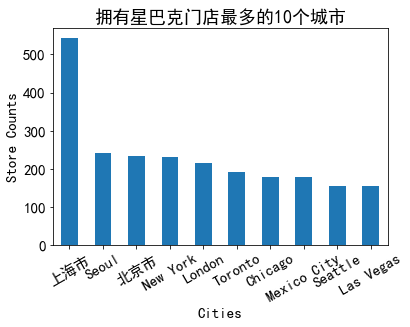

In [18]:

# 绘制拥有星巴克门店最多的10个城市的柱状图
city_top10.plot(kind='bar',rot=30)
# 为图形添加标题
plt.title('拥有星巴克门店最多的10个城市')
# 为y轴添加标签
plt.ylabel('Store Counts')
# 为x轴添加标签
plt.xlabel('Cities')

可以看到数据不是很规范，城市名称既有中文又有英文，而且上海被存储为ShangHai和Shanghai。
对于上海的问题，我们将拼音全部改为小写即可；
对于中文和拼音混用的问题，可以使用相应的python库（如库pinyin）将中文转换为拼音后作统计。

In [19]:
from pypinyin import lazy_pinyin
import pandas as pd

PF=pd.read_csv(f"data//directory.csv",header=0,dtype=str)

#选择中国的数据
df = PF.loc[PF["Country"]=="CN"]


df1 = df.copy()

# df1.shape
# df2 = df1.copy()

df1["City"] = df1["City"].str.replace("市","")  #去掉“市”


#将汉字城市名改为拼音
#df1["City"] = df1["City"].apply(lambda x:pinyin.get(x, format="strip", delimiter="")[0:-3]) #去掉“市”的拼音
df1["City"]=df1["City"].apply(lambda x:" ".join(lazy_pinyin(x)))

#将城市名改为小写
df1["City"] = df1["City"].str.lower()

#df1.to_csv(f"1.csv", mode="w+", encoding="utf-8-sig", header=True,index=False)
#统计每个城市的星巴克数量
df1 = df1.groupby(["City"]).size().sort_values( ascending=False)
print(df1.head(10))

City
shang hai     542
bei jing      234
hang zhou     117
shen zhen     113
guang zhou    106
hong kong     104
cheng du       98
su zhou        90
nan jing       73
wu han         67
dtype: int64


这里使用到了DataFrame.apply(func)方法，该方法将函数func应用到整个DataFrame上，
也可以通过指定axis参数来指定每一行或每一列的数据应用函数func。

接下来使用reset_index方法将上一步得到的数据封装到一个新的DataFrame中排序即可。

Text(0.5, 0, 'Cities')

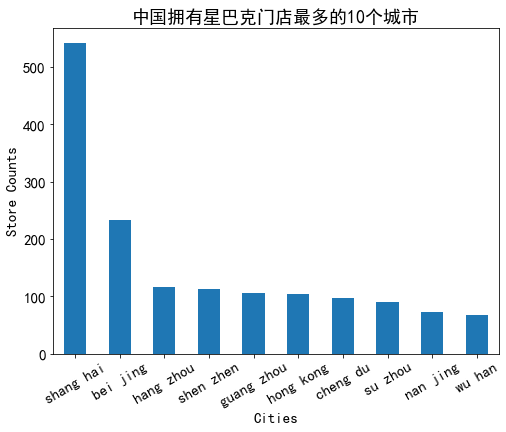

In [20]:
plt.figure(1,figsize=(8,6))
df1.head(10).plot(kind='bar',rot=30)
plt.title('中国拥有星巴克门店最多的10个城市')
plt.ylabel('Store Counts')
plt.xlabel('Cities')


Company Owned：公司独资直营，这也是星巴克门店最多的经营方式

Licensed: 许可经营

Joint Venture: 合资经营，比如：国内江浙沪地区的星巴克最早就是由星巴克与统一集团联手经营

Franchise：授权经营，类似麦当劳的经营模式


## **问题7:** 绘制星巴克门店所有权类型饼状图

## 操作说明：
饼状图应当将plot当中的`kind`设置为`pie`



<AxesSubplot:title={'center':'星巴克门店所有权类型'}, ylabel='Ownership Type'>

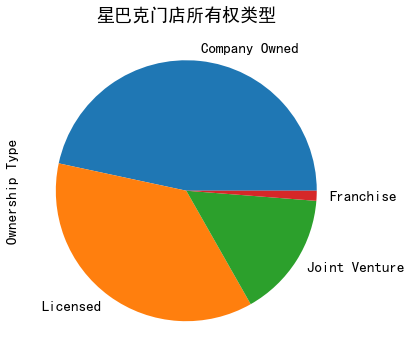

In [21]:

plt.figure(1,figsize=(8,6))
ownership = star['Ownership Type'].value_counts()
plt.title('星巴克门店所有权类型')
# 绘制星巴克门店所有权类型饼状图
ownership.plot(kind='pie')

# 七、实验课后任务



学生应当按照操作说明指导完成本次实验涉及相关任务，完成本次Jupyter Notebook实验报告以后，应将本实验报告文件（.ipynb）按照授课教师指定方式进行上传。


# 八、实验考核

实验满分100分，共2个任务，7个问题，问题1-问题6每个14分，问题7分数16分。按照学生完成问题的程度、代码运行结果、分析结果等质量标准酌情给出对应分数。


# 九、实验资源


本实验内容不可能涵盖Matplotlib中所有的特性和图表类型。就像我们之前介绍到的其他工具一样，使用IPython的TAB自动补全以及帮助功能（参见[IPython的帮助和文档](01.01-Help-And-Documentation.ipynb)）对于学习Matplotlib的API是非常有帮助的。[Matplotlib在线文档](http://matplotlib.org/)也是一个很有帮助的参考内容。建议去浏览[Matplotlib画廊](http://matplotlib.org/gallery.html)：上面展示了上百个不同种类图表的缩略图，每个图都有一个超链接能导航到创建这个图表的Python代码片段页面。使用上述方法可以直观的浏览和学习许多不同类型的图表样式和可视化技巧。


